In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Population parameters
N = int(100)                            # Number of human agents
M = np.linspace(0,N,N+1,dtype = int)    # Number of AI agents

# Donation's game parameters
b = np.linspace(1.1,3.1,100)            
c = 1

R = b - c
S = -c
T = b
P = 0

# Social imitation parameter exploration
beta_H = [0.001,0.1,1,10,100]

beta_AI_eq_H_OPT = True                  # Choose if beta_AI takes the same values than beta_H

if beta_AI_eq_H_OPT==False:
    beta_AI = 0.1     # if beta_AI is indentifiable, indicate the value it should take

def freq_coop(frac_rho):
    return (frac_rho/(1+frac_rho))

#AI = C:
def rho_frac_C(N,M,bH,bAI,R,S,T,P):
    df = ((M+N-1)*S - T)/(N+M-1)
    pplus = (1+np.exp(-bH*df))**(-1)
    pminus = (1+np.exp(bH*df))**(-1)
    pai = (1+np.exp(-bAI*df))**(-1)
    prod = 1
    for ii in range(1,N):
        T_frac = (N-ii)*(ii*pplus + M*pai)/((N-ii)*pminus*ii)
        prod *= T_frac
    return prod

#AI = IR:
def rho_frac_AI(N,M,bH,R,S,T,P):
    df = ((M+N-1)*S + (M-1)*T)/(N+M-1)
    if bH*(N-1)*df < 600:
        return np.exp(bH*(N-1)*df)
    else:
        return np.exp(600)

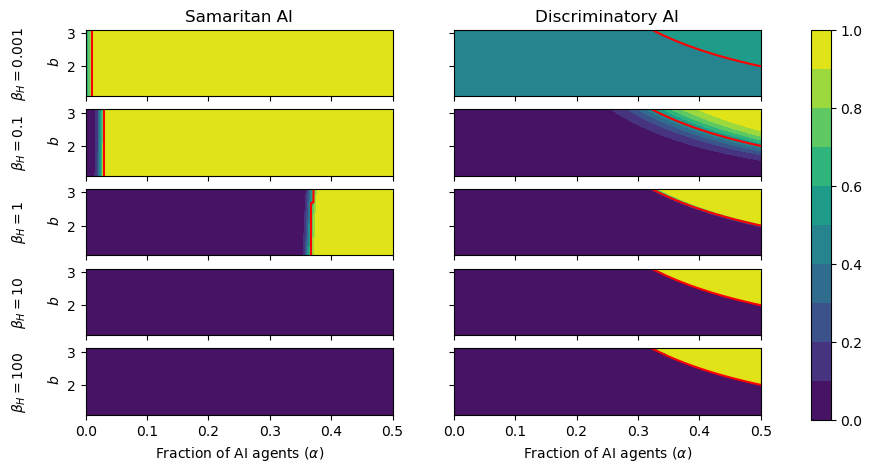

In [3]:

#%% PLOT for case AI = C
m,B = np.meshgrid(M/(M+N),b)

l_C = []

for w in range(len(beta_H)):
    
    if beta_AI_eq_H_OPT:
        beta_AI = beta_H[w]
    
    geom_rho = np.zeros(np.shape(B))
    for jj in range(len(M)):
        for ii in range(len(T)):
            x = rho_frac_C(N,M[jj],beta_H[w],beta_AI,R[ii],S,T[ii],P)
            geom_rho[ii,jj] = x 
    f = freq_coop(geom_rho)
    l_C.append(f)
    

#%% plot for case AI = IR
l_IR = []

for q in range(len(beta_H)):
    geom_rho2 = np.zeros(np.shape(B))    
    for kk in range(len(M)):
        for tt in range(len(T)):
            geom_rho2[tt,kk] = rho_frac_AI(N,M[kk],beta_H[q],R[tt],S,T[tt],P)
    f2 = freq_coop(geom_rho2)
    l_IR.append(f2)
   

#%% auxiliar variable for ploting the transition in samaritan case:

#we extract the index for each row at which the values of the desired magnitude
#becomes equal or greater than 0.5:

l_aux = []

for ii in range(len(l_C)):
    alpha_sam=np.zeros((len(b),2),dtype = int)
    for jj in range(l_C[ii].shape[0]):
        for kk in range(l_C[ii].shape[1]):
            if l_C[ii][jj][kk] >= 0.5:
                alpha_sam[jj,0] = int(jj)
                alpha_sam[jj,1] = int(kk)
                break
    l_aux.append(alpha_sam)
        

#%% Plots    
levels = np.linspace(0,1,11)
fig, ax = plt.subplots(nrows = len(beta_H),ncols = 2,sharex = True, sharey = True, figsize=(10,5))
labels = ["Samaritan AI", "Discriminatory AI"]
for p in range(2):
    ax[len(beta_H)-1,p].set_xlabel(r'Fraction of AI agents ($\alpha$)')
    ax[0,p].set_title(labels[p])
for l in range(len(beta_H)):
    ax[l,0].set_ylabel(r'$\beta_{H} = $' + str(beta_H[l]) + '\n\n $b$')
for i in range(len(l_C)):
    cfC = ax[i,0].contourf(m,B,l_C[i],levels = levels)
    ax[i,0].plot(m[l_aux[i][:,0],l_aux[i][:,1]], B[l_aux[i][:,0],l_aux[i][:,1]], color = 'r')
for j in range(len(l_IR)):
    cfIR = ax[j,1].contourf(m,B,l_IR[j],levels = levels)
    alpha = M[1:]/(M[1:]+N)
    ax[j,1].plot(alpha[alpha > 0.32], 1/alpha[alpha > 0.32], color = 'r')
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.78])
fig.colorbar(cfIR, cax=cbar_ax)
plt.show()

In [4]:
# @title AI=C/IR

def SAM_payoff_difference(x,alpha,T,R,P,S):
  return (R-T)*((1-alpha)*x+alpha) + (S-P)*(1-alpha)*(1-x)

def SAM_evolution_eq(x,alpha,beta_H,beta_AI):
  return (1-x) * (x*(1-alpha)*np.tanh(beta_H* SAM_payoff_difference(x,alpha,T,R,P,S )*0.5) + alpha/ (1+np.exp(-beta_AI* SAM_payoff_difference(x,alpha,T,R,P,S ))))

def DISCR_payoff_difference(x,alpha,T,R,P,S):
  return (R-T)*((1-alpha)*x) + (S-P)*(1-alpha)*(1-x) + alpha*(R-P)

def DISCR_evolution_eq(x,alpha,beta_H,beta_AI):
  return (1-x) * x * (1-alpha) * np.tanh(beta_H* DISCR_payoff_difference(x,alpha,T,R,P,S )*0.5)

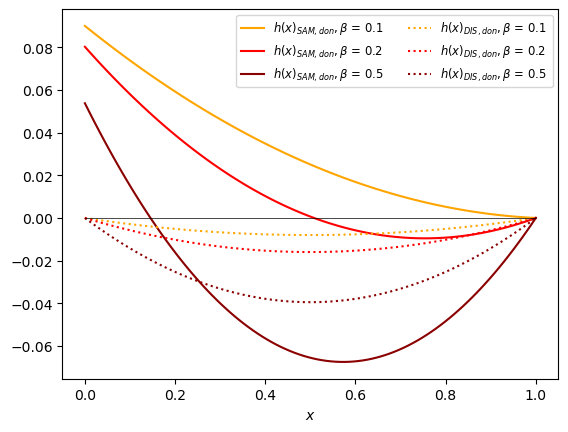

In [5]:
x = np.linspace(0,1,100)

parameter_array = [0.1,0.2,0.5]
colors_SAM = ['orange','red','darkred']
colors_DISCR = ['cyan','blue','darkblue']

b = 6
c = 2
alpha = 0.2

for j in range(len(parameter_array)):
  beta = parameter_array[j]
  beta_AI,beta_H = beta,beta
  T,R,P,S = b, b-c ,0 ,-c
  plt.plot(x,SAM_evolution_eq(x,alpha,beta_H,beta_AI),label=r'$h(x)_{SAM,don},\beta$ = %.1f ' %beta,color=colors_SAM[j])

for j in range(len(parameter_array)):
  beta = parameter_array[j]
  beta_AI,beta_H = beta,beta
  T,R,P,S = b, b-c ,0 ,-c
  plt.plot(x,DISCR_evolution_eq(x,alpha,beta_H,beta_AI),linestyle='dotted',label=r'$h(x)_{DIS,don},\beta$ = %.1f ' %beta,color=colors_SAM[j])

plt.hlines(0,0,1,color="black",linewidths=0.5)
plt.xlabel(r'$x$')
plt.legend(fontsize='small',ncol=2)
plt.show()

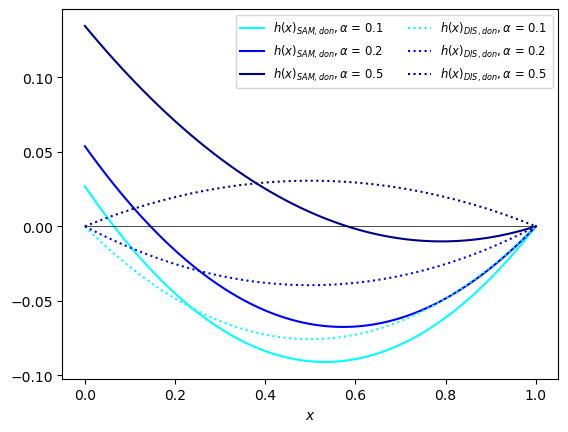

In [6]:
x = np.linspace(0,1,100)

parameter_array = [0.1,0.2,0.5]
colors_SAM = ['cyan','blue','darkblue']

b = 6
c = 2

beta = 0.5
beta_AI,beta_H = beta, beta

for j in range(len(parameter_array)):
  alpha = parameter_array[j]
  T,R,P,S = b, b-c ,0 ,-c
  plt.plot(x,SAM_evolution_eq(x,alpha,beta_H,beta_AI),label=r'$h(x)_{SAM,don},\alpha$ = %.1f ' %alpha,color=colors_SAM[j])


for j in range(len(parameter_array)):
  alpha = parameter_array[j]
  T,R,P,S = b, b-c ,0 ,-c
  plt.plot(x,DISCR_evolution_eq(x,alpha,beta_H,beta_AI),linestyle='dotted',label=r'$h(x)_{DIS,don},\alpha$ = %.1f ' %alpha,color=colors_SAM[j])

plt.hlines(0,0,1,color="black",linewidths=0.5)
plt.xlabel(r'$x$')
plt.legend(fontsize='small',ncol=2)
plt.show()